# Data Exploration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Dataset from kaggle

In [ ]:
#import file
df1 = pd.read_csv("dataset_kaggle.csv",encoding = "latin-1")

In [ ]:
#information of data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#drop column all Unnamed
df1.drop(df1.iloc[:,2:],inplace=True,axis=1)

In [ ]:
#rename columns
df1.rename(columns={"v1": "label", "v2": "sms"},inplace=True)

In [ ]:
 # see the first 5 data
df1.head(5)

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#count the number of missing values
df1.isna().sum()

label    0
sms      0
dtype: int64

In [ ]:
#show counts of spam sms and not spam sms (ham)
print('The total number of spam and not spam message in our dataset is\n',df1['label'].value_counts())

The total number of spam and not spam message in our dataset is
 label
ham     4825
spam     747
Name: count, dtype: int64


In [ ]:
#number of rows and columns in the DataFrame.
df1.shape

(5572, 2)

In [ ]:
#check duplicate value
df1.duplicated().sum()

403

In [ ]:
#drop duplicate value
df1=df1.drop_duplicates()

In [ ]:
print('The total number of spam and not spam message in our dataset is\n',df1['label'].value_counts())

The total number of spam and not spam message in our dataset is
 label
ham     4516
spam     653
Name: count, dtype: int64


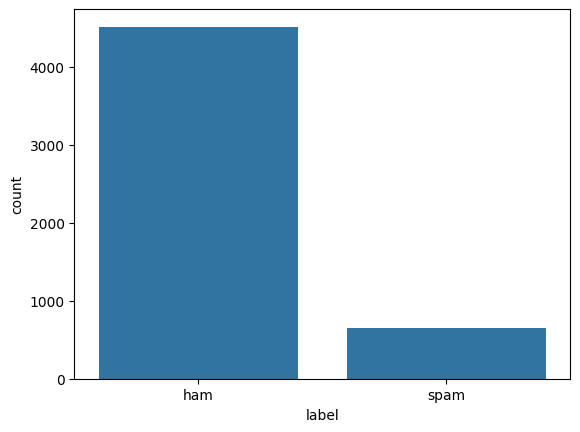

In [ ]:
# create a bar plot of the counts of each unique value in the 'label' column
sns.countplot(x=df1['label'])
plt.show()

In [ ]:
df1

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


- Dataset from research

In [ ]:
#import file
df2 = pd.read_csv("dataset_research.csv",encoding = "latin-1")

In [ ]:
#combines file
df = pd.concat([df1, df2], ignore_index=True)

In [ ]:
df

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
6279,spam,You have won a Nokia 7250i. This is what you g...
6280,spam,Get ur 1st RINGTONE FREE NOW! Reply to this ms...
6281,spam,Ur cash-balance is currently 500 pounds - to m...
6282,spam,Records indicate you were involved in an accid...


In [ ]:
print('The total number of spam and not spam message in our dataset is\n',df['label'].value_counts())

The total number of spam and not spam message in our dataset is
 label
ham     4516
spam    1768
Name: count, dtype: int64


In [ ]:
df.duplicated().sum()

359

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
print('The total number of spam and not spam message in our dataset is\n',df['label'].value_counts())

The total number of spam and not spam message in our dataset is
 label
ham     4516
spam    1409
Name: count, dtype: int64


# Data Preprocessing

In [ ]:
pip install nlpaug

In [ ]:
!pip install contractions

In [ ]:
import nltk
import re
import nlpaug.augmenter.word as naw
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from sklearn.utils import resample

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df['label'] = df['label'].map( {'spam': 1, 'ham': 0})

<ipython-input-85-b463ce2299f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map( {'spam': 1, 'ham': 0})


In [ ]:
df

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
6274,1,Your SAM registration has been received! Click...
6279,1,You have won a Nokia 7250i. This is what you g...
6280,1,Get ur 1st RINGTONE FREE NOW! Reply to this ms...
6282,1,Records indicate you were involved in an accid...


In [ ]:
# Copy the 'sms' column to the 'change_sms' column
df['change_sms'] = df['sms'].copy()

# Remove leading and trailing whitespaces from the 'change_sms' column
df['change_sms'] = df['change_sms'].str.strip()

# Convert all characters in the 'change_sms' column to lowercase
df['change_sms'] = df['change_sms'].str.lower()

# Expand contractions
df['change_sms'] = df['change_sms'].apply(lambda x: contractions.fix(x))


<ipython-input-87-659813654961>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change_sms'] = df['sms'].copy()
<ipython-input-87-659813654961>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change_sms'] = df['change_sms'].str.strip()
<ipython-input-87-659813654961>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [ ]:
df

,label,sms,change_sms
0,0,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,0,Ok lar... Joking wif u oni...,ok lar... joking wif you oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,you dun say so early hor... you c already then...
4,0,"Nah I don't think he goes to usf, he lives aro...","nah i do not think he goes to usf, he lives ar..."
...,...,...,...
6274,1,Your SAM registration has been received! Click...,your sam registration has been received! click...
6279,1,You have won a Nokia 7250i. This is what you g...,you have won a nokia 7250i. this is what you g...
6280,1,Get ur 1st RINGTONE FREE NOW! Reply to this ms...,get you are 1st ringtone free now! reply to th...
6282,1,Records indicate you were involved in an accid...,records indicate you were involved in an accid...


In [ ]:
def change_word_eng(sms):
    regex = r"(http(s)?:\/\/.)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)"
    sms = re.sub(regex, ' link ', sms)
    sms= re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b',' email ',sms)
    sms = re.sub(r'\b(?:\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\d{10})\b', ' phonenumber ', sms)
    sms = re.sub(r'\b(?:\d{3}[-\.\s]??\d{7})\b', ' phonenumber ', sms)
    sms = re.sub(r'\b(?:\d{2}[-\.\s]??\d{3}[-\.\s]??\d{4}|\d{9})\b', ' phonenumber ', sms)
    sms = re.sub(r'\b\d{10}\b', ' phonenumber ', sms)
    sms = re.sub(r'\b\d{9}\b', ' phonenumber ', sms)
    sms = re.sub(r'\d+', ' number ', sms)
    sms = re.sub(r'[£$฿]', ' moneysymbol ', sms)
    sms = re.sub(r'[\"]', ' ', sms)
    sms = re.sub(r'[^a-zA-Z\s\'\"]|^\'|\'$', '', sms)
    return sms


# Create a new column 'change_sms' by applying the function to 'sms' column
df['change_sms'] = df['change_sms'].apply(lambda x: change_word_eng(x))



<ipython-input-89-50d0c943b1b2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change_sms'] = df['change_sms'].apply(lambda x: change_word_eng(x))


In [ ]:
df

,label,sms,change_sms
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif you oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in number a wkly comp to win fa c...
3,0,U dun say so early hor... U c already then say...,you dun say so early hor you c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i do not think he goes to usf he lives aro...
...,...,...,...
6274,1,Your SAM registration has been received! Click...,your sam registration has been received click ...
6279,1,You have won a Nokia 7250i. This is what you g...,you have won a nokia number i this is what yo...
6280,1,Get ur 1st RINGTONE FREE NOW! Reply to this ms...,get you are number st ringtone free now reply...
6282,1,Records indicate you were involved in an accid...,records indicate you were involved in an accid...


In [ ]:
# Remove punctuation
df['change_sms'] = df['change_sms'].apply(lambda x: re.sub(r'[^\w\d\s]|_\s*$', ' ', x))

# Remove whitespace between terms with single space
df['change_sms'] = df['change_sms'].apply(lambda x: re.sub(r'\s+', ' ', x))

<ipython-input-91-699dc787d415>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change_sms'] = df['change_sms'].apply(lambda x: re.sub(r'[^\w\d\s]|_\s*$', ' ', x))
<ipython-input-91-699dc787d415>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change_sms'] = df['change_sms'].apply(lambda x: re.sub(r'\s+', ' ', x))


In [ ]:
#function for tokenize
def tokenize(df , model) :
  new_values = []
  for i in df.index:
    if model == "nltk":
      s = word_tokenize(df['change_sms'][i])
    new_values.append(s)
  df[model] = new_values
  return df

In [ ]:
#tokenize the text in a DataFrame using NLTK
tokenize(df , "nltk")

<ipython-input-92-b4ec36622400>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model] = new_values


,label,sms,change_sms,nltk
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,0,Ok lar... Joking wif u oni...,ok lar joking wif you oni,"[ok, lar, joking, wif, you, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in number a wkly comp to win fa cup...,"[free, entry, in, number, a, wkly, comp, to, w..."
3,0,U dun say so early hor... U c already then say...,you dun say so early hor you c already then say,"[you, dun, say, so, early, hor, you, c, alread..."
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i do not think he goes to usf he lives aro...,"[nah, i, do, not, think, he, goes, to, usf, he..."
...,...,...,...,...
6274,1,Your SAM registration has been received! Click...,your sam registration has been received click ...,"[your, sam, registration, has, been, received,..."
6279,1,You have won a Nokia 7250i. This is what you g...,you have won a nokia number i this is what you...,"[you, have, won, a, nokia, number, i, this, is..."
6280,1,Get ur 1st RINGTONE FREE NOW! Reply to this ms...,get you are number st ringtone free now reply ...,"[get, you, are, number, st, ringtone, free, no..."
6282,1,Records indicate you were involved in an accid...,records indicate you were involved in an accid...,"[records, indicate, you, were, involved, in, a..."


In [ ]:
# Initialize the lemmatizer
wl = WordNetLemmatizer()

#function to map POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V') or tag in ['MD']:
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

#lemmatizer function
def lemmatizer(df):
    new_values = []
    for i in df.index:
        word_pos_tags = nltk.pos_tag(df['nltk'][i]) # Get position tags
        a = [wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
        new_values.append(a)
    df['nltk'] = new_values
    return df



In [ ]:
# Lemmatize the 'nltk' column using the lemmatizer function
df['nltk'] = lemmatizer(df[['nltk']])

# Join the lemmatized tokens back into a single string in each row of the 'nltk' column
df['nltk'] = df['nltk'].apply(' '.join)

<ipython-input-94-29701191be3c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nltk'] = new_values
<ipython-input-95-1a544be00279>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nltk'] = lemmatizer(df[['nltk']])
<ipython-input-95-1a544be00279>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [ ]:
df

,label,sms,change_sms,nltk
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif you oni,ok lar joking wif you oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in number a wkly comp to win fa cup...,free entry in number a wkly comp to win fa cup...
3,0,U dun say so early hor... U c already then say...,you dun say so early hor you c already then say,you dun say so early hor you c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i do not think he goes to usf he lives aro...,nah i do not think he go to usf he live around...
...,...,...,...,...
6274,1,Your SAM registration has been received! Click...,your sam registration has been received click ...,your sam registration have be receive click he...
6279,1,You have won a Nokia 7250i. This is what you g...,you have won a nokia number i this is what you...,you have win a nokia number i this be what you...
6280,1,Get ur 1st RINGTONE FREE NOW! Reply to this ms...,get you are number st ringtone free now reply ...,get you be number st ringtone free now reply t...
6282,1,Records indicate you were involved in an accid...,records indicate you were involved in an accid...,record indicate you be involve in an accident ...


In [ ]:
# Stopwords
stop_words = set(stopwords.words('english'))
df['nltk'] = df['nltk'].apply(lambda x: ' '.join(['' if word.lower().strip() in stop_words else word for word in x.split()]))

# Stemming
ss = SnowballStemmer("english")
df['nltk'] = df['nltk'].apply(lambda x: ' '.join([ss.stem(term) for term in x.split()]))

# Delete whitespace
df['nltk'] = df['nltk'].apply(lambda x: ' '.join(word.strip() for word in x.split() if word.strip()))


<ipython-input-97-725644f2dee2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nltk'] = df['nltk'].apply(lambda x: ' '.join(['' if word.lower().strip() in stop_words else word for word in x.split()]))
<ipython-input-97-725644f2dee2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nltk'] = df['nltk'].apply(lambda x: ' '.join([ss.stem(term) for term in x.split()]))
<ipython-input-97-725644f2dee2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [ ]:
df['nltk'].duplicated().sum()

536

In [ ]:
df.drop_duplicates(subset=['nltk'], keep='first', inplace=True)

<ipython-input-99-5a73740f885e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['nltk'], keep='first', inplace=True)


In [ ]:
df['nltk'].duplicated().sum()

0

In [ ]:
df

,label,sms,change_sms,nltk
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif you oni,ok lar joke wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in number a wkly comp to win fa cup...,free entri number wkli comp win fa cup final t...
3,0,U dun say so early hor... U c already then say...,you dun say so early hor you c already then say,dun say earli hor c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i do not think he goes to usf he lives aro...,nah think go usf live around though
...,...,...,...,...
6273,1,Double Mins & Double Txt & 1/2 price Call Mobi...,double mins double txt number number price cal...,doubl min doubl txt number number price call m...
6274,1,Your SAM registration has been received! Click...,your sam registration has been received click ...,sam registr receiv click complet process http ...
6279,1,You have won a Nokia 7250i. This is what you g...,you have won a nokia number i this is what you...,win nokia number get win free auction take par...
6282,1,Records indicate you were involved in an accid...,records indicate you were involved in an accid...,record indic involv accid last number number y...


- Data Augmentation

In [ ]:
pip install textattack

In [ ]:

from textattack.augmentation import WordNetAugmenter
from textattack.augmentation import EmbeddingAugmenter
from sklearn.utils import shuffle

In [ ]:
# Separate spam and ham messages
spam_messages = df[df['label'] == 1]['nltk']
ham_messages = df[df['label'] == 0]['nltk']

# Upsample the spam class using text augmentation with synonym replacement
aug = WordNetAugmenter()

num_to_generate = len(ham_messages) - len(spam_messages)

generated_messages = set()  # Archive newly created messages to check for duplicates

for original_message in spam_messages:
    while len(generated_messages) < num_to_generate:
        # Apply synonym replacement augmentation
        augmented_message = aug.augment(original_message)

        # Make sure not replaced
        augmented_message = re.sub(r'\blink\b', 'link', str(augmented_message))
        augmented_message = re.sub(r'\bphonenumber\b', 'phonenumber', str(augmented_message))
        augmented_message = re.sub(r'\bnumber\b', 'number', str(augmented_message))
        augmented_message = re.sub(r'\bemail\b', 'email', str(augmented_message))
        augmented_message = re.sub(r'\bmoneysymbol\b', 'moneysymbol', str(augmented_message))
        # Remove square brackets, single quotes, and double quotes
        augmented_message = re.sub(r'[\[\]\'"]', '', augmented_message)

        if augmented_message not in generated_messages and augmented_message not in spam_messages:
            generated_messages.add(augmented_message)

# Create a new DataFrame with the original spam messages and the augmented ones
augmented_df = pd.DataFrame({'nltk': list(generated_messages), 'label': 1})


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
augmented_df

,nltk,label
0,free entri enumerate wkli comp win fa cup fina...,1
1,destitute entri number wkli comp win fa cup fi...,1
2,absolve entri routine wkli comp win fa cup fin...,1
3,free entri number wkli comp win fa cup final t...,1
4,absolve entri number wkli comp win fa cup fina...,1
...,...,...
3544,resign entri number wkli comp win fa cup final...,1
3545,free entri number wkli comp gain fa cup final ...,1
3546,devoid entri number wkli comp win fa cup concl...,1
3547,free entri number wkli comp gain fa cup final ...,1


In [ ]:
augmented_df['nltk'].duplicated().sum()

0

In [ ]:
# Concatenate the original DataFrame and the augmented DataFrame
df = pd.concat([df, augmented_df], ignore_index=True)

In [ ]:
df

,label,sms,change_sms,nltk
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif you oni,ok lar joke wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in number a wkly comp to win fa cup...,free entri number wkli comp win fa cup final t...
3,0,U dun say so early hor... U c already then say...,you dun say so early hor you c already then say,dun say earli hor c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i do not think he goes to usf he lives aro...,nah think go usf live around though
...,...,...,...,...
8933,1,NaN,NaN,resign entri number wkli comp win fa cup final...
8934,1,NaN,NaN,free entri number wkli comp gain fa cup final ...
8935,1,NaN,NaN,devoid entri number wkli comp win fa cup concl...
8936,1,NaN,NaN,free entri number wkli comp gain fa cup final ...


In [ ]:
# Shuffle the DataFrame
balanced_df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
balanced_df

,label,sms,change_sms,nltk
0,1,NaN,NaN,free entri number wkli comp win fa cup final t...
1,0,Oh wow thats gay. Will firmware update help,oh wow that is gay will firmware update help,oh wow gay firmwar updat help
2,1,NaN,NaN,complimentary entri number wkli comp win fa cu...
3,1,NaN,NaN,free entri number wkli comp win fa cup last tk...
4,1,NaN,NaN,absolve entri number wkli comp win fa cup fina...
...,...,...,...,...
8933,1,NaN,NaN,detached entri number wkli comp win fa cup fin...
8934,1,You won't believe it but it's true. It's Incre...,you will not believe it but it is true it is i...,believ true incred txts repli g learn truli am...
8935,1,NaN,NaN,destitute entri number wkli comp win fa cup fi...
8936,0,"see, i knew giving you a break a few times wou...",see i knew giving you a break a few times woul...,see knew give break time woul lead alway want ...


In [ ]:
balanced_df['label'].value_counts()

label
1    4469
0    4469
Name: count, dtype: int64

In [ ]:
balanced_df['nltk'].duplicated().sum()

0

In [ ]:
duplicated_rows = balanced_df.loc[balanced_df['nltk'].duplicated(), :]
print(duplicated_rows)


Empty DataFrame
Columns: [label, sms, change_sms, nltk]
Index: []


In [ ]:
# remove duplicated messages
balanced_df.drop_duplicates(subset=['nltk'], inplace=True)


In [ ]:
# Select the row index for processing
n = 1

# Split the text into words
words = balanced_df['nltk'][n].split()

# Count the number of words
word_count = len(words)

# Print the original text, word count, and the list of words
print("sms: ", balanced_df['nltk'][n])
print("\ncount: ", word_count)
print("nltk: ", words)


sms:  oh wow gay firmwar updat help

count:  6
nltk:  ['oh', 'wow', 'gay', 'firmwar', 'updat', 'help']


In [ ]:
# Calculate the number of words in each text
balanced_df['num_words'] = balanced_df['nltk'].apply(lambda x: len(x.split()))

# Find the row with the maximum number of words
max_words_row = balanced_df.loc[balanced_df['num_words'].idxmax()]

# Print the text in the row with the maximum number of words
print("Text in the row with the maximum number of words:")
print(max_words_row['nltk'])

# Print the number of words in the row with the maximum number of words
print("Number of words in the row with the maximum number of words:", max_words_row['num_words'])

# Store the maximum number of words for further use
max_len = max_words_row['num_words']

Text in the row with the maximum number of words:
love start attractioni feel need everi time around link first thing come thoughtsi would start day end link everi time link everi breath link life happen around link life name heri would cri link give happi take sorrowsi readi fight anyon heri love crazi thing link proov anyon girl beauti ladi whole planeti alway sing prais link start make chicken curri end maki link beauti link get everi morn thank god day mei would like say link tell later
Number of words in the row with the maximum number of words: 79


In [ ]:
print(max_len)

79


In [ ]:
balanced_df

,label,sms,change_sms,nltk,num_words
0,1,NaN,NaN,free entri number wkli comp win fa cup final t...,25
1,0,Oh wow thats gay. Will firmware update help,oh wow that is gay will firmware update help,oh wow gay firmwar updat help,6
2,1,NaN,NaN,complimentary entri number wkli comp win fa cu...,25
3,1,NaN,NaN,free entri number wkli comp win fa cup last tk...,25
4,1,NaN,NaN,absolve entri number wkli comp win fa cup fina...,25
...,...,...,...,...,...
8933,1,NaN,NaN,detached entri number wkli comp win fa cup fin...,25
8934,1,You won't believe it but it's true. It's Incre...,you will not believe it but it is true it is i...,believ true incred txts repli g learn truli am...,12
8935,1,NaN,NaN,destitute entri number wkli comp win fa cup fi...,25
8936,0,"see, i knew giving you a break a few times wou...",see i knew giving you a break a few times woul...,see knew give break time woul lead alway want ...,32


- Import file of final dataset

In [ ]:
# balanced_df.to_csv('ta_finaldata.csv', index=False, encoding='utf-8-sig')

In [ ]:
# Load file
final_df_path = "ta_finaldata.csv"
final_df = pd.read_csv(final_df_path)

In [ ]:
import _utils as fn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import Embedding, Dense,Dropout,Flatten,Bidirectional, LSTM, SimpleRNN, Conv1D, MaxPooling1D,GlobalMaxPooling1D
from keras.layers import GRU
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping

In [ ]:
final_df['nltk'][1]

'oh wow gay firmwar updat help'

- Word Embedding โดยใช้โมเดล Word2Vec

In [ ]:
print("max_len: ", max_len)

max_len:  79


In [ ]:
pip install gensim

In [ ]:
#Splitting the data into dependent and independent variables i.e, features and the target columns
X = final_df['nltk']
Y =  final_df['label']

#Splitting the data such that 20% will be used for testing and the remaining 82% will be used for training.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


In [ ]:
len(X_train),len(Y_train),len(X_test),len(Y_test)

(7150, 7150, 1788, 1788)

In [ ]:
%%time
documents = []
for text in X_train:
    if isinstance(text, str):
        documents.append(text.split())
    else:
        # Handle cases where the element is not a string (e.g., NaN or other non-string types)
        documents.append([])


CPU times: user 24 ms, sys: 4.98 ms, total: 29 ms
Wall time: 96.1 ms


In [ ]:
len(documents)

7150

In [ ]:
corpus = final_df['nltk'].tolist()

# Tokenizing the corpus
tokenized_corpus = []
for text in corpus:
    if isinstance(text, str):
        tokenized_corpus.append(word_tokenize(text))
    else:
        # Handle NaN or non-string values
        tokenized_corpus.append([])


In [ ]:
import gensim
# Adjust these parameters based on your specific needs
embedding_dim = max_len
window_size = 3
min_count = 5
workers = 8
w2v_model = gensim.models.Word2Vec(sentences=tokenized_corpus,vector_size=embedding_dim, window=window_size, min_count=min_count, workers=workers)
# min_count (int, optional) – Ignores all words with total frequency lower than this.
# workers (int, optional) – Use these many worker threads to train the model (=faster training with multicore machines).
# window (int, optional) – Maximum distance between the current and predicted word within a sentence.
# vector_size (int, optional) – Dimensionality of the word vectors.

In [ ]:
# Build vocabulary from a dictionary of word frequencies.
w2v_model.build_vocab(documents)

In [ ]:
# Get the vocabulary from the Word2Vec model
words = list(w2v_model.wv.key_to_index.keys())

# Calculate the vocabulary size
vocab_size = len(words)

# Print the vocabulary size
print("Vocabulary size:", vocab_size)

Vocabulary size: 1293


In [ ]:
%%time
w2v_model.train(documents,total_examples=len(documents),epochs=32)

CPU times: user 5.19 s, sys: 98.7 ms, total: 5.29 s
Wall time: 6.85 s


(1485974, 3586656)

In [ ]:
X_train = [str(text) if pd.notnull(text) else '' for text in X_train]

# Creating a Tokenizer and fitting it on the cleaned text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Defining special tokens and updating the tokenizer's word index
special_vocab = {'<PAD>': 0, '<START>': 1, '<UNKNOWN>': 2, '<UNUSED>': 3}
tokenizer.word_index = {**special_vocab, **{word: index + 3 for word, index in tokenizer.word_index.items()}}


In [ ]:
tokenizer.word_index

{'<PAD>': 0,
 '<START>': 1,
 '<UNKNOWN>': 2,
 '<UNUSED>': 3,
 'number': 4,
 'entri': 5,
 'fa': 6,
 'txt': 7,
 'text': 8,
 'st': 9,
 'receiv': 10,
 'appli': 11,
 'wkli': 12,
 'tkts': 13,
 'questionstd': 14,
 'ratetc': 15,
 'may': 16,
 'comp': 17,
 'cup': 18,
 'final': 19,
 'win': 20,
 'free': 21,
 'get': 22,
 'come': 23,
 'link': 24,
 'call': 25,
 'go': 26,
 'bit': 27,
 'act': 28,
 'amount': 29,
 'count': 30,
 'turn': 31,
 'total': 32,
 'enumerate': 33,
 'list': 34,
 'numerate': 35,
 'figure': 36,
 'numeral': 37,
 'issue': 38,
 'routine': 39,
 'moneysymbol': 40,
 'know': 41,
 'want': 42,
 'like': 43,
 'ltgt': 44,
 'send': 45,
 'love': 46,
 'day': 47,
 'ok': 48,
 'time': 49,
 'good': 50,
 'tell': 51,
 'think': 52,
 'say': 53,
 'see': 54,
 'one': 55,
 'week': 56,
 'need': 57,
 'make': 58,
 'home': 59,
 'today': 60,
 'mobil': 61,
 'messag': 62,
 'take': 63,
 'lor': 64,
 'repli': 65,
 'back': 66,
 'stop': 67,
 'r': 68,
 'pleas': 69,
 'still': 70,
 'new': 71,
 'phone': 72,
 'n': 73,
 'last':

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 6044


In [ ]:
X_train = [[1] + [tokenizer.word_index.get(word, 2) for word in sentence.split()] for sentence in X_train]
X_test = [[1] + [tokenizer.word_index.get(word, 2) for word in sentence.split()] for sentence in X_test]

In [ ]:
# Pad sequences in X_train and X_test directly
x_train = pad_sequences(X_train, maxlen=max_len)
x_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
x_train

array([[   0,    0,    0, ...,  138,   74,  514],
       [   0,    0,    0, ...,  232,   44,  114],
       [   0,    0,    0, ...,   11,    4,    4],
       ...,
       [   0,    0,    0, ...,   72, 1523,  652],
       [   0,    0,    0, ...,   11,    4,    4],
       [   0,    0,    0, ...,   47, 1854,  718]], dtype=int32)

In [ ]:
len(x_train),len(Y_train),len(x_test),len(Y_test)

(7150, 7150, 1788, 1788)

In [ ]:
# Build Embedding Layer
embedding_matrix = np.zeros((vocab_size, max_len))
print(embedding_matrix)
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(6044, 79)


In [ ]:
embedding_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Get all the words in the model
word_index = tokenizer.word_index
vocab = [word for word, idx in word_index.items()]

# Create a file text_classification_vocab.txt
with open('ta_w2v_text_classification_vocab.txt', 'w') as f:
    for i, word in enumerate(vocab):
        f.write(f"{word} {i}\n")


- Data for test

In [ ]:
# Load file

data_test = pd.read_csv('dataeng_text.csv')


In [ ]:
# Copy the 'sms' column to the 'change_sms' column
data_test['change_sms'] = data_test['sms'].copy()
# Remove leading and trailing whitespaces from the 'change_sms' column
data_test['change_sms'] = data_test['change_sms'].str.strip()
# Convert all characters in the 'change_sms' column to lowercase
data_test['change_sms'] = data_test['change_sms'].str.lower()
# Expand contractions
data_test['change_sms'] = data_test['change_sms'].apply(lambda x: contractions.fix(x))
# Create a new column 'change_sms' by applying the function to 'sms' column
data_test['change_sms'] = data_test['change_sms'].apply(lambda x: change_word_eng(x))
# Remove punctuation
data_test['change_sms'] = data_test['change_sms'].apply(lambda x: re.sub(r'[^\w\d\s]|_\s*$', ' ', x))
# Remove whitespace between terms with single space
data_test['change_sms'] = data_test['change_sms'].apply(lambda x: re.sub(r'\s+', ' ', x))
#tokenize the text in a DataFrame using NLTK
tokenize(data_test , "nltk")
# Lemmatize the 'nltk' column using the lemmatizer function
data_test['nltk'] = lemmatizer(data_test[['nltk']])
# Join the lemmatized tokens back into a single string in each row of the 'nltk' column
data_test['nltk'] = data_test['nltk'].apply(' '.join)
# Stopwords
stop_words = set(stopwords.words('english'))
data_test['nltk'] =data_test['nltk'].apply(lambda x: ' '.join(['' if word.lower().strip() in stop_words else word for word in x.split()]))
# Stemming
ss = SnowballStemmer("english")
data_test['nltk'] = data_test['nltk'].apply(lambda x: ' '.join([ss.stem(term) for term in x.split()]))
# Delete whitespace
data_test['nltk'] = data_test['nltk'].apply(lambda x: ' '.join(word.strip() for word in x.split() if word.strip()))



<ipython-input-94-29701191be3c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nltk'] = new_values


In [ ]:
data_test

,Unnamed: 0,sms,label,change_sms,nltk
0,0,Beachwaver used their browse and cart abandonm...,0,beachwaver used their browse and cart abandonm...,beachwav use brows cart abandon remind boost e...
1,1,Since many people eagerly await Memorial Day s...,0,since many people eagerly await memorial day s...,sinc mani peopl eager await memori day sale sh...
2,2,Purity Coffee gave their audience a special Mo...,0,purity coffee gave their audience a special mo...,puriti coffe give audienc special mother day t...
3,3,To make the most of increased website traffic ...,0,to make the most of increased website traffic ...,make increas websit traffic around memori day ...
4,4,Thank you for being a valued customer! As a to...,0,thank you for being a valued customer as a tok...,thank valu custom token appreci offer discount...
5,5,You received 3.41 Bitcoin (BTC). To confirm yo...,1,you received number number bitcoin btc to conf...,receiv number number bitcoin btc confirm trans...
6,6,"Hi, this is Cynde from HR. We have a couple qu...",1,hi this is cynde from hr we have a couple ques...,hi cynd hr coupl question regard applic pleas ...
7,7,We’ve detected suspicious activity on your Goo...,1,we have detected suspicious activity on your g...,detect suspici activ googl account follow link...
8,8,"Your niece has been arrested and needs $7,500",1,your niece has been arrested and needs moneysy...,niec arrest need moneysymbol number number
9,9,Thank you for being a valued customer! As a to...,1,thank you for being a valued customer as a tok...,thank valu custom token appreci offer discount...


In [ ]:
# Convert text data in X_train to sequences of integers and pad them to maxlen
datatest = [[1] + [tokenizer.word_index.get(word, 2) for word in sentence.split()] for sentence in data_test['nltk']]
datatest = pad_sequences(datatest , maxlen=max_len)
labeltest = data_test['label'].values

- Early stopping of model

In [ ]:
# Train the model with early stopping
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3,verbose=1,restore_best_weights=True, )
]


# LSTM

- Model Training

In [ ]:
lstm_w2v = Sequential()
lstm_w2v.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=False))
lstm_w2v.add(LSTM(32, return_sequences=True))
lstm_w2v.add(Dropout(0.5))
lstm_w2v.add(LSTM(32))
lstm_w2v.add(Dropout(0.5))
lstm_w2v.add(Dense(32, activation='relu'))
lstm_w2v.add(Dropout(0.5))
lstm_w2v.add(Dense(1, activation='sigmoid'))

lstm_w2v.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
lstm_w2v.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 79, 79)            477476    
                                                                 
 lstm (LSTM)                 (None, 79, 32)            14336     
                                                                 
 dropout (Dropout)           (None, 79, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [ ]:
# Train the model
history_lstm_w2v = lstm_w2v.fit(x_train, Y_train, epochs=20, batch_size=32, validation_data=(x_test, Y_test), callbacks=callbacks)

Epoch 1/20
224/224 [==============================] - 80s 254ms/step - loss: 0.1323 - acc: 0.9713 - val_loss: 0.0434 - val_acc: 0.9871
Epoch 2/20
224/224 [==============================] - 46s 204ms/step - loss: 0.0533 - acc: 0.9859 - val_loss: 0.0469 - val_acc: 0.9871
Epoch 3/20
224/224 [==============================] - 32s 142ms/step - loss: 0.0492 - acc: 0.9867 - val_loss: 0.0426 - val_acc: 0.9860
Epoch 4/20
224/224 [==============================] - 29s 132ms/step - loss: 0.0461 - acc: 0.9878 - val_loss: 0.0389 - val_acc: 0.9860
Epoch 5/20
224/224 [==============================] - 30s 133ms/step - loss: 0.0420 - acc: 0.9890 - val_loss: 0.0417 - val_acc: 0.9877
Epoch 6/20
224/224 [==============================] - 31s 138ms/step - loss: 0.0419 - acc: 0.9873 - val_loss: 0.0323 - val_acc: 0.9888
Epoch 7/20
224/224 [==============================] - 28s 127ms/step - loss: 0.0356 - acc: 0.9899 - val_loss: 0.0338 - val_acc: 0.9894
Epoch 8/20
224/224 [==============================] - 3

- Model Evaluation

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = lstm_w2v.evaluate(x_test, Y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')
print(f'Test loss: {test_loss * 100:.2f}%')

56/56 [==============================] - 1s 22ms/step - loss: 0.0323 - acc: 0.9888
Test accuracy: 98.88%
Test loss: 3.23%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Evaluate the LSTM model on the test data
lstm_w2v.evaluate(x_test, Y_test)

y_pred1 = lstm_w2v.predict(x_test)
y_pred_binary1 = (y_pred1 > 0.5).astype(int)


conf_matrix1 = confusion_matrix(Y_test, y_pred_binary1)
print("Confusion Matrix:")
print(conf_matrix1)

classification_rep1 = classification_report(Y_test, y_pred_binary1)
print("Classification Report:")
print(classification_rep1)

56/56 [==============================] - 3s 44ms/step
Confusion Matrix:
[[911   9]
 [ 11 857]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       920
           1       0.99      0.99      0.99       868

    accuracy                           0.99      1788
   macro avg       0.99      0.99      0.99      1788
weighted avg       0.99      0.99      0.99      1788



Last train accuracy: 0.9902098178863525
Last validation accuracy: 0.9876957535743713


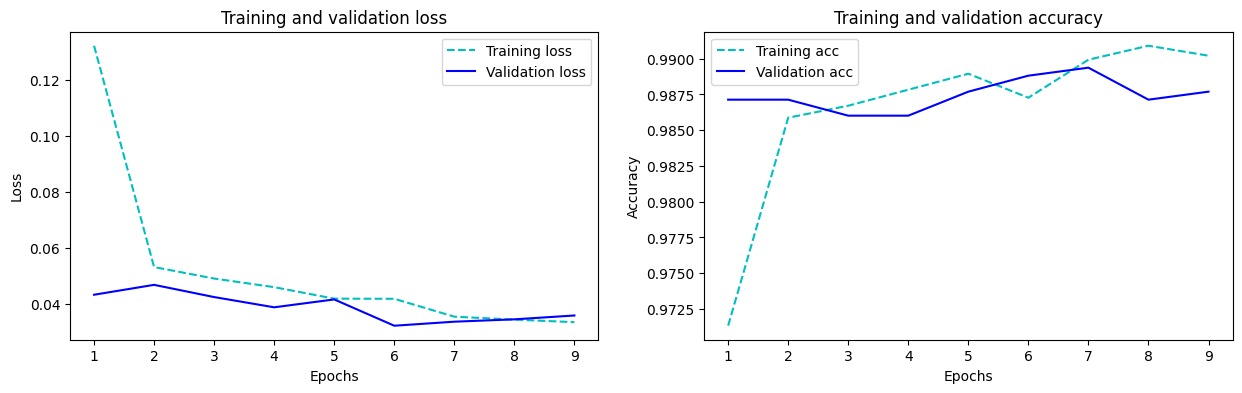

In [ ]:
#show graph loss and accuracy
fn.show_result(history_lstm_w2v)

In [ ]:
lstm_w2v.inputs[0]

<KerasTensor: shape=(None, 79) dtype=float32 (created by layer 'embedding_input')>

In [ ]:
lstm_w2v.outputs[0]

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>

- Convert tflite model

In [ ]:
run_model = tf.function(lambda x: lstm_w2v(x))
# This is important, let's fix the input size.
BATCH_SIZE = 1
STEPS =max_len

concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE,STEPS], lstm_w2v.inputs[0].dtype))


# model directory.
MODEL_DIR = "keras_lstm"
lstm_w2v.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
tflite_model = converter.convert()
# Save the TensorFlow Lite model to a file
file = open('ta_lstm_w2v.tflite', 'wb')
file.write(tflite_model)
file.close()



In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='ta_lstm_w2v.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)

Input details: [{'name': 'serving_default_x:0', 'index': 0, 'shape': array([ 1, 79], dtype=int32), 'shape_signature': array([ 1, 79], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall:0', 'index': 44, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([1, 1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


- Check the saved Tflite model to see if it works efficiently

In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='ta_lstm_w2v.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


from sklearn.metrics import accuracy_score

# Initialize an empty list to store the predictions
predictions = []

# Iterate over each sample in the test dataset
for i in range(len(datatest)):
    # Get the input sequence for the current sample and convert it to FLOAT32
    input_sequence_float32 = datatest[i].reshape(1, -1).astype(np.float32)

    # Perform inference
    interpreter.set_tensor(input_details[0]['index'], input_sequence_float32)
    interpreter.invoke()

    # Get the output
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Convert output to binary prediction
    binary_prediction = (output_data > 0.5).astype(int)

    # Append the prediction to the list
    predictions.append(binary_prediction[0])

# accuracy for test data
accuracy1 = accuracy_score(labeltest, predictions)

# Print the accuracy for test data
print("Accuracy :", accuracy1)


Accuracy : 0.5


In [ ]:
# Display the predictions for each text
for i in range(len(data_test)):
    print("Text:", data_test['nltk'][i])
    print("True Label:", labeltest[i])
    print("Predicted Label:", predictions[i])
    print()


Text: beachwav use brows cart abandon remind boost engag revenu memori day sale strateg updat messag highlight final day get number entir site simpl yet effect chang emphas limitedtim natur offer creat great sens urgenc custom shop immedi take advantag deal expir
True Label: 0
Predicted Label: [1]

Text: sinc mani peopl eager await memori day sale shop summer cloth normal brand invit custom check late arriv ahead long holiday weekend messag come perfect time anyon consid buy new outfit annual barbecu outdoor gather come
True Label: 0
Predicted Label: [1]

Text: puriti coffe give audienc special mother day treat number sitewid plus free ship brand first announc sale sm earli may ensur peopl plenti time order continu promot midnight mother day send mix email sms remind send throughout sale period keep engag convers high
True Label: 0
Predicted Label: [0]

Text: make increas websit traffic around memori day dw home launch custom signup unit teas upcom offer captur new subscrib incentiv op

# RNN


- Model Training

In [ ]:
rnn_w2v = Sequential()
rnn_w2v.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=False))
rnn_w2v.add(SimpleRNN(32, return_sequences=True))
rnn_w2v.add(Dropout(0.5))
rnn_w2v.add(SimpleRNN(32))
rnn_w2v.add(Dropout(0.5))
rnn_w2v.add(Dense(32, activation='relu'))
rnn_w2v.add(Dropout(0.5))
rnn_w2v.add(Dense(units=1, activation='sigmoid'))
rnn_w2v.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
rnn_w2v.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 79, 79)            477476    
                                                                 
 simple_rnn (SimpleRNN)      (None, 79, 32)            3584      
                                                                 
 dropout_3 (Dropout)         (None, 79, 32)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

In [ ]:
# Train the models
history_rnn_w2v = rnn_w2v.fit(x_train, Y_train, epochs=20, batch_size=32, validation_data=(x_test, Y_test), callbacks=[callbacks])

Epoch 1/20
224/224 [==============================] - 13s 41ms/step - loss: 0.1953 - acc: 0.9253 - val_loss: 0.0727 - val_acc: 0.9821
Epoch 2/20
224/224 [==============================] - 11s 47ms/step - loss: 0.0820 - acc: 0.9820 - val_loss: 0.0615 - val_acc: 0.9866
Epoch 3/20
224/224 [==============================] - 10s 45ms/step - loss: 0.0626 - acc: 0.9852 - val_loss: 0.0549 - val_acc: 0.9871
Epoch 4/20
224/224 [==============================] - 8s 37ms/step - loss: 0.0605 - acc: 0.9839 - val_loss: 0.0428 - val_acc: 0.9849
Epoch 5/20
224/224 [==============================] - 13s 57ms/step - loss: 0.0623 - acc: 0.9839 - val_loss: 0.0526 - val_acc: 0.9866
Epoch 6/20
224/224 [==============================] - 12s 52ms/step - loss: 0.0718 - acc: 0.9818 - val_loss: 0.0771 - val_acc: 0.9804
Epoch 7/20
224/224 [==============================] - 21s 95ms/step - loss: 0.0666 - acc: 0.9841 - val_loss: 0.0597 - val_acc: 0.9866
Epoch 7: early stopping


- Model Evaluation

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = rnn_w2v.evaluate(x_test, Y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')
print(f'Test loss: {test_loss * 100:.2f}%')

56/56 [==============================] - 1s 12ms/step - loss: 0.0428 - acc: 0.9849
Test accuracy: 98.49%
Test loss: 4.28%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
rnn_w2v.evaluate(x_test,Y_test)

y_pred2 = rnn_w2v.predict(x_test)
y_pred_binary2 = (y_pred2 > 0.5).astype(int)

conf_matrix2 = confusion_matrix(Y_test, y_pred_binary2)
print("Confusion Matrix:")
print(conf_matrix2)

classification_rep2 = classification_report(Y_test, y_pred_binary2)
print("Classification Report:")
print(classification_rep2)

56/56 [==============================] - 1s 13ms/step
Confusion Matrix:
[[909  11]
 [ 16 852]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       920
           1       0.99      0.98      0.98       868

    accuracy                           0.98      1788
   macro avg       0.98      0.98      0.98      1788
weighted avg       0.98      0.98      0.98      1788



Last train accuracy: 0.9840559363365173
Last validation accuracy: 0.9865771532058716


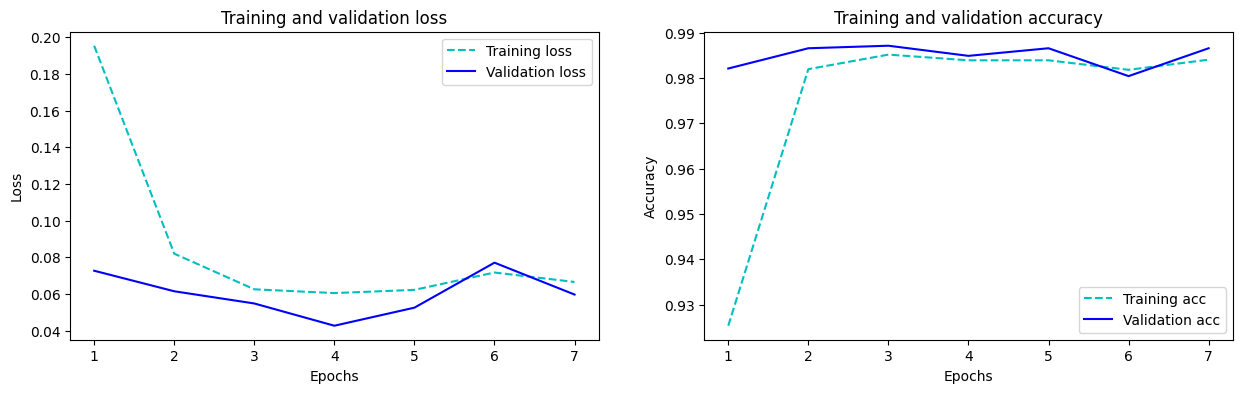

In [ ]:
#show graph loss and accuracy
fn.show_result(history_rnn_w2v)

In [ ]:
rnn_w2v.inputs[0]

<KerasTensor: shape=(None, 79) dtype=float32 (created by layer 'embedding_1_input')>

In [ ]:
rnn_w2v.outputs[0]

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_3')>

- Convert tflite model

In [ ]:
run_model = tf.function(lambda x: rnn_w2v(x))
# This is important, let's fix the input size.
BATCH_SIZE = 1
STEPS =max_len

concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE,STEPS], rnn_w2v.inputs[0].dtype))


# model directory.
MODEL_DIR = "keras_rnn"
rnn_w2v.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
tflite_model = converter.convert()
# Save the TensorFlow Lite model to a file
file = open('ta_rnn_w2v.tflite', 'wb')
file.write(tflite_model)
file.close()



In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='ta_rnn_w2v.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)

Input details: [{'name': 'serving_default_x:0', 'index': 0, 'shape': array([ 1, 79], dtype=int32), 'shape_signature': array([ 1, 79], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall:0', 'index': 31, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([1, 1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


- Check the saved Tflite model to see if it works efficiently

In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='ta_rnn_w2v.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


from sklearn.metrics import accuracy_score

# Initialize an empty list to store the predictions
predictions = []

# Iterate over each sample in the test dataset
for i in range(len(datatest)):
    # Get the input sequence for the current sample and convert it to FLOAT32
    input_sequence_float32 = datatest[i].reshape(1, -1).astype(np.float32)

    # Perform inference
    interpreter.set_tensor(input_details[0]['index'], input_sequence_float32)
    interpreter.invoke()

    # Get the output
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Convert output to binary prediction
    binary_prediction = (output_data > 0.5).astype(int)

    # Append the prediction to the list
    predictions.append(binary_prediction[0])

# accuracy for test data
accuracy2 = accuracy_score(labeltest, predictions)

# Print the accuracy for test data
print("Accuracy :", accuracy2)


Accuracy : 0.4


In [ ]:
# Display the predictions for each text
for i in range(len(datatest)):
    print("Text:", data_test['nltk'][i])
    print("True Label:", labeltest[i])
    print("Predicted Label:", predictions[i])
    print()


Text: beachwav use brows cart abandon remind boost engag revenu memori day sale strateg updat messag highlight final day get number entir site simpl yet effect chang emphas limitedtim natur offer creat great sens urgenc custom shop immedi take advantag deal expir
True Label: 0
Predicted Label: [1]

Text: sinc mani peopl eager await memori day sale shop summer cloth normal brand invit custom check late arriv ahead long holiday weekend messag come perfect time anyon consid buy new outfit annual barbecu outdoor gather come
True Label: 0
Predicted Label: [0]

Text: puriti coffe give audienc special mother day treat number sitewid plus free ship brand first announc sale sm earli may ensur peopl plenti time order continu promot midnight mother day send mix email sms remind send throughout sale period keep engag convers high
True Label: 0
Predicted Label: [1]

Text: make increas websit traffic around memori day dw home launch custom signup unit teas upcom offer captur new subscrib incentiv op

# BiLSTM

- Model Training

In [ ]:
bilstm_w2v = Sequential()
bilstm_w2v.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=False))
bilstm_w2v.add(Bidirectional(LSTM(32, return_sequences=True)))
bilstm_w2v.add(Dropout(0.5))
bilstm_w2v.add(Bidirectional(LSTM(32)))
bilstm_w2v.add(Dropout(0.5))
bilstm_w2v.add(Dense(32, activation='relu'))
bilstm_w2v.add(Dropout(0.5))
bilstm_w2v.add(Dense(1, activation='sigmoid'))

bilstm_w2v.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
bilstm_w2v.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 79, 79)            477476    
                                                                 
 bidirectional (Bidirection  (None, 79, 64)            28672     
 al)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 79, 64)            0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)               

In [ ]:
history_bilstm_w2v = bilstm_w2v.fit(x_train, Y_train, epochs=20, batch_size=32, validation_data=(x_test, Y_test), callbacks=callbacks)

Epoch 1/20
224/224 [==============================] - 45s 162ms/step - loss: 0.1341 - acc: 0.9660 - val_loss: 0.0494 - val_acc: 0.9866
Epoch 2/20
224/224 [==============================] - 31s 139ms/step - loss: 0.0535 - acc: 0.9870 - val_loss: 0.0433 - val_acc: 0.9866
Epoch 3/20
224/224 [==============================] - 30s 136ms/step - loss: 0.0497 - acc: 0.9877 - val_loss: 0.0489 - val_acc: 0.9877
Epoch 4/20
224/224 [==============================] - 34s 153ms/step - loss: 0.0496 - acc: 0.9887 - val_loss: 0.0411 - val_acc: 0.9871
Epoch 5/20
224/224 [==============================] - 31s 140ms/step - loss: 0.0394 - acc: 0.9892 - val_loss: 0.0394 - val_acc: 0.9866
Epoch 6/20
224/224 [==============================] - 31s 138ms/step - loss: 0.0415 - acc: 0.9890 - val_loss: 0.0700 - val_acc: 0.9843
Epoch 7/20
224/224 [==============================] - 31s 137ms/step - loss: 0.0389 - acc: 0.9901 - val_loss: 0.0311 - val_acc: 0.9899
Epoch 8/20
224/224 [==============================] - 3

- Model Evaluation

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = bilstm_w2v.evaluate(x_test, Y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')
print(f'Test loss: {test_loss * 100:.2f}%')

56/56 [==============================] - 2s 30ms/step - loss: 0.0311 - acc: 0.9899
Test accuracy: 98.99%
Test loss: 3.11%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
bilstm_w2v.evaluate(x_test, Y_test)

y_pred3 = bilstm_w2v.predict(x_test)
y_pred_binary3 = (y_pred3> 0.5).astype(int)

conf_matrix3 = confusion_matrix(Y_test, y_pred_binary3)
print("Confusion Matrix:")
print(conf_matrix3)

classification_rep3 = classification_report(Y_test, y_pred_binary3)
print("Classification Report:")
print(classification_rep3)

56/56 [==============================] - 4s 35ms/step
Confusion Matrix:
[[912   8]
 [ 10 858]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       920
           1       0.99      0.99      0.99       868

    accuracy                           0.99      1788
   macro avg       0.99      0.99      0.99      1788
weighted avg       0.99      0.99      0.99      1788



Last train accuracy: 0.9918881058692932
Last validation accuracy: 0.9904921650886536


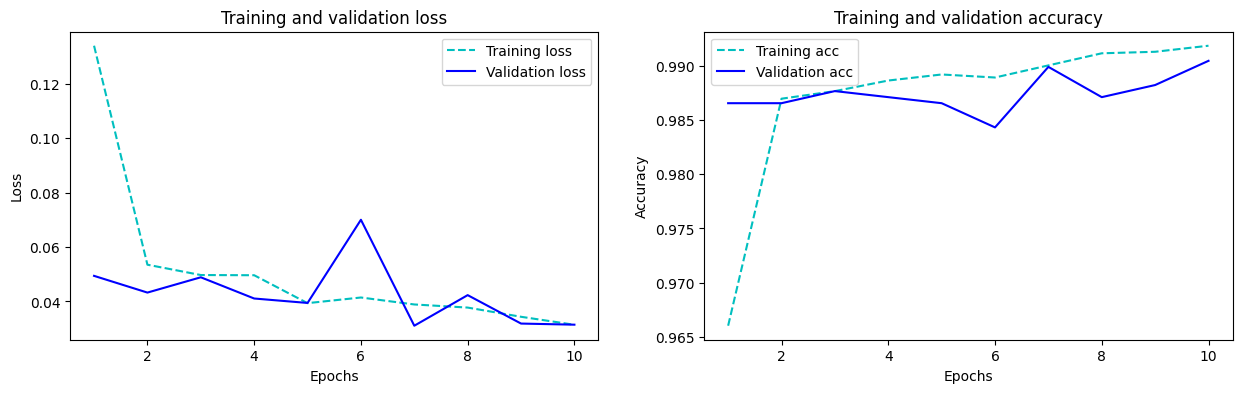

In [ ]:
#show graph loss and accuracy
fn.show_result(history_bilstm_w2v)

In [ ]:
bilstm_w2v.inputs[0]

<KerasTensor: shape=(None, 79) dtype=float32 (created by layer 'embedding_2_input')>

In [ ]:
bilstm_w2v.outputs[0]

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_5')>

- Convert tflite model

In [ ]:
run_model = tf.function(lambda x: bilstm_w2v(x))
# This is important, let's fix the input size.
BATCH_SIZE = 1
STEPS =max_len

concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE,STEPS], bilstm_w2v.inputs[0].dtype))


# model directory.
MODEL_DIR = "keras_bilstm"
bilstm_w2v.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
tflite_model = converter.convert()
# Save the TensorFlow Lite model to a file
file = open('ta_bilstm_w2v.tflite', 'wb')
file.write(tflite_model)
file.close()



In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='ta_bilstm_w2v.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)

Input details: [{'name': 'serving_default_x:0', 'index': 0, 'shape': array([ 1, 79], dtype=int32), 'shape_signature': array([ 1, 79], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall:0', 'index': 81, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([1, 1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


- Check the saved Tflite model to see if it works efficiently

In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='ta_bilstm_w2v.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


from sklearn.metrics import accuracy_score

# Initialize an empty list to store the predictions
predictions = []

# Iterate over each sample in the test dataset
for i in range(len(datatest)):
    # Get the input sequence for the current sample and convert it to FLOAT32
    input_sequence_float32 = datatest[i].reshape(1, -1).astype(np.float32)

    # Perform inference
    interpreter.set_tensor(input_details[0]['index'], input_sequence_float32)
    interpreter.invoke()

    # Get the output
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Convert output to binary prediction
    binary_prediction = (output_data > 0.5).astype(int)

    # Append the prediction to the list
    predictions.append(binary_prediction[0])

# accuracy for test data
accuracy3 = accuracy_score(labeltest, predictions)

# Print the accuracy for test data
print("Accuracy :", accuracy3)


Accuracy : 0.4


In [ ]:
# Display the predictions for each text
for i in range(len(datatest)):
    print("Text:", data_test['nltk'][i])
    print("True Label:", labeltest[i])
    print("Predicted Label:", predictions[i])
    print()


Text: beachwav use brows cart abandon remind boost engag revenu memori day sale strateg updat messag highlight final day get number entir site simpl yet effect chang emphas limitedtim natur offer creat great sens urgenc custom shop immedi take advantag deal expir
True Label: 0
Predicted Label: [1]

Text: sinc mani peopl eager await memori day sale shop summer cloth normal brand invit custom check late arriv ahead long holiday weekend messag come perfect time anyon consid buy new outfit annual barbecu outdoor gather come
True Label: 0
Predicted Label: [1]

Text: puriti coffe give audienc special mother day treat number sitewid plus free ship brand first announc sale sm earli may ensur peopl plenti time order continu promot midnight mother day send mix email sms remind send throughout sale period keep engag convers high
True Label: 0
Predicted Label: [1]

Text: make increas websit traffic around memori day dw home launch custom signup unit teas upcom offer captur new subscrib incentiv op

# CNN

- Model Training

In [ ]:
cnn_w2v = Sequential()
cnn_w2v.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=False))
cnn_w2v.add(Conv1D(32, 5, activation='relu'))
cnn_w2v.add(MaxPooling1D(2))
cnn_w2v.add(Dropout(0.5))
cnn_w2v.add(Conv1D(64, 5, activation='relu'))
cnn_w2v.add(MaxPooling1D(2))
cnn_w2v.add(Dropout(0.2))
cnn_w2v.add(Conv1D(128, 5, activation='relu'))
cnn_w2v.add(GlobalMaxPooling1D())
cnn_w2v.add(Dropout(0.2))
cnn_w2v.add(Flatten())
cnn_w2v.add(Dense(64, activation='relu'))
cnn_w2v.add(Dropout(0.5))
cnn_w2v.add(Dense(1, activation='sigmoid'))
cnn_w2v.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

cnn_w2v.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 79, 79)            477476    
                                                                 
 conv1d (Conv1D)             (None, 75, 32)            12672     
                                                                 
 max_pooling1d (MaxPooling1  (None, 37, 32)            0         
 D)                                                              
                                                                 
 dropout_9 (Dropout)         (None, 37, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 33, 64)            10304     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 16, 64)            0         
 g1D)                                                 

In [ ]:
history_cnn_w2v = cnn_w2v.fit(x_train, Y_train, epochs=20, batch_size=32, validation_data=(x_test, Y_test), callbacks=callbacks)

Epoch 1/20
224/224 [==============================] - 7s 23ms/step - loss: 0.1517 - acc: 0.9531 - val_loss: 0.0656 - val_acc: 0.9787
Epoch 2/20
224/224 [==============================] - 5s 21ms/step - loss: 0.0745 - acc: 0.9783 - val_loss: 0.0570 - val_acc: 0.9827
Epoch 3/20
224/224 [==============================] - 6s 29ms/step - loss: 0.0661 - acc: 0.9810 - val_loss: 0.0547 - val_acc: 0.9832
Epoch 4/20
224/224 [==============================] - 5s 21ms/step - loss: 0.0630 - acc: 0.9797 - val_loss: 0.0591 - val_acc: 0.9810
Epoch 5/20
224/224 [==============================] - 5s 21ms/step - loss: 0.0576 - acc: 0.9822 - val_loss: 0.0525 - val_acc: 0.9843
Epoch 6/20
224/224 [==============================] - 7s 29ms/step - loss: 0.0588 - acc: 0.9803 - val_loss: 0.0592 - val_acc: 0.9827
Epoch 7/20
224/224 [==============================] - 4s 19ms/step - loss: 0.0553 - acc: 0.9815 - val_loss: 0.0631 - val_acc: 0.9776
Epoch 8/20
224/224 [==============================] - 4s 19ms/step - 

- Model Evaluation

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = cnn_w2v.evaluate(x_test, Y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')
print(f'Test loss: {test_loss * 100:.2f}%')

56/56 [==============================] - 0s 7ms/step - loss: 0.0502 - acc: 0.9832
Test accuracy: 98.32%
Test loss: 5.02%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred4 = cnn_w2v.predict(x_test)
y_pred_binary4 = (y_pred4 > 0.5).astype(int)

conf_matrix4 = confusion_matrix(Y_test, y_pred_binary4)
print("Confusion Matrix:")
print(conf_matrix4)

classification_rep4 = classification_report(Y_test, y_pred_binary4)
print("Classification Report:")
print(classification_rep4)

56/56 [==============================] - 0s 6ms/step
Confusion Matrix:
[[903  17]
 [ 13 855]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       920
           1       0.98      0.99      0.98       868

    accuracy                           0.98      1788
   macro avg       0.98      0.98      0.98      1788
weighted avg       0.98      0.98      0.98      1788



Last train accuracy: 0.9861538410186768
Last validation accuracy: 0.9809843301773071


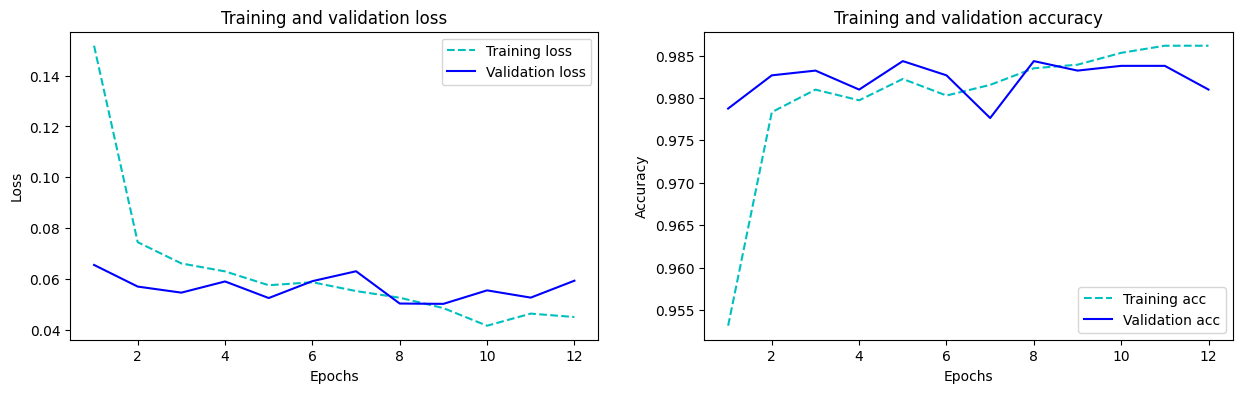

In [ ]:
#show graph loss and accuracy
fn.show_result(history_cnn_w2v)

In [ ]:
cnn_w2v.inputs[0]

<KerasTensor: shape=(None, 79) dtype=float32 (created by layer 'embedding_3_input')>

In [ ]:
cnn_w2v.outputs[0]

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_7')>

- Convert tflite model

In [ ]:
run_model = tf.function(lambda x: cnn_w2v(x))
# This is important, let's fix the input size.
BATCH_SIZE = 1
STEPS =max_len

concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE,STEPS], cnn_w2v.inputs[0].dtype))


# model directory.
MODEL_DIR = "keras_cnn"
cnn_w2v.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
tflite_model = converter.convert()
# Save the TensorFlow Lite model to a file
file = open('ta_cnn_w2v.tflite', 'wb')
file.write(tflite_model)
file.close()



In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='ta_cnn_w2v.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)

Input details: [{'name': 'serving_default_x:0', 'index': 0, 'shape': array([ 1, 79], dtype=int32), 'shape_signature': array([ 1, 79], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall:0', 'index': 35, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([1, 1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


- Check the saved Tflite model to see if it works efficiently

In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='ta_cnn_w2v.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


from sklearn.metrics import accuracy_score

# Initialize an empty list to store the predictions
predictions = []

# Iterate over each sample in the test dataset
for i in range(len(datatest)):
    # Get the input sequence for the current sample and convert it to FLOAT32
    input_sequence_float32 = datatest[i].reshape(1, -1).astype(np.float32)

    # Perform inference
    interpreter.set_tensor(input_details[0]['index'], input_sequence_float32)
    interpreter.invoke()

    # Get the output
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Convert output to binary prediction
    binary_prediction = (output_data > 0.5).astype(int)

    # Append the prediction to the list
    predictions.append(binary_prediction[0])

# accuracy for test data
accuracy4 = accuracy_score(labeltest, predictions)

# Print the accuracy for test data
print("Accuracy :", accuracy4)


Accuracy : 0.3


In [ ]:
# Display the predictions for each text
for i in range(len(datatest)):
    print("Text:", data_test['nltk'][i])
    print("True Label:", labeltest[i])
    print("Predicted Label:", predictions[i])
    print()


Text: beachwav use brows cart abandon remind boost engag revenu memori day sale strateg updat messag highlight final day get number entir site simpl yet effect chang emphas limitedtim natur offer creat great sens urgenc custom shop immedi take advantag deal expir
True Label: 0
Predicted Label: [1]

Text: sinc mani peopl eager await memori day sale shop summer cloth normal brand invit custom check late arriv ahead long holiday weekend messag come perfect time anyon consid buy new outfit annual barbecu outdoor gather come
True Label: 0
Predicted Label: [1]

Text: puriti coffe give audienc special mother day treat number sitewid plus free ship brand first announc sale sm earli may ensur peopl plenti time order continu promot midnight mother day send mix email sms remind send throughout sale period keep engag convers high
True Label: 0
Predicted Label: [1]

Text: make increas websit traffic around memori day dw home launch custom signup unit teas upcom offer captur new subscrib incentiv op

# GRU

- Model Training

In [ ]:
gru_w2v = Sequential()
gru_w2v.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=False))
gru_w2v.add(GRU(32, return_sequences=True))
gru_w2v.add(Dropout(0.5))
gru_w2v.add(GRU(32))
gru_w2v.add(Dropout(0.5))
gru_w2v.add(Dense(32, activation='relu'))
gru_w2v.add(Dropout(0.5))
gru_w2v.add(Dense(1, activation='sigmoid'))

gru_w2v.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
gru_w2v.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 79, 79)            477476    
                                                                 
 gru (GRU)                   (None, 79, 32)            10848     
                                                                 
 dropout_13 (Dropout)        (None, 79, 32)            0         
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dropout_15 (Dropout)        (None, 32)               

In [ ]:
history_gru_w2v = gru_w2v.fit(x_train, Y_train, epochs=20, batch_size=32, validation_data=(x_test, Y_test), callbacks=callbacks)

Epoch 1/20
224/224 [==============================] - 27s 100ms/step - loss: 0.1350 - acc: 0.9592 - val_loss: 0.0527 - val_acc: 0.9855
Epoch 2/20
224/224 [==============================] - 18s 82ms/step - loss: 0.0578 - acc: 0.9856 - val_loss: 0.0472 - val_acc: 0.9860
Epoch 3/20
224/224 [==============================] - 18s 81ms/step - loss: 0.0529 - acc: 0.9866 - val_loss: 0.0473 - val_acc: 0.9860
Epoch 4/20
224/224 [==============================] - 20s 89ms/step - loss: 0.0478 - acc: 0.9878 - val_loss: 0.0465 - val_acc: 0.9877
Epoch 5/20
224/224 [==============================] - 18s 81ms/step - loss: 0.0446 - acc: 0.9881 - val_loss: 0.0443 - val_acc: 0.9877
Epoch 6/20
224/224 [==============================] - 18s 82ms/step - loss: 0.0439 - acc: 0.9898 - val_loss: 0.0477 - val_acc: 0.9843
Epoch 7/20
224/224 [==============================] - 19s 84ms/step - loss: 0.0394 - acc: 0.9897 - val_loss: 0.0388 - val_acc: 0.9894
Epoch 8/20
224/224 [==============================] - 19s 86m

- Model Evaluation

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = gru_w2v.evaluate(x_test, Y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')
print(f'Test loss: {test_loss * 100:.2f}%')

56/56 [==============================] - 1s 19ms/step - loss: 0.0368 - acc: 0.9894
Test accuracy: 98.94%
Test loss: 3.68%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred5 = gru_w2v.predict(x_test)
y_pred_binary5 = (y_pred5 > 0.5).astype(int)

conf_matrix5 = confusion_matrix(Y_test, y_pred_binary5)
print("Confusion Matrix:")
print(conf_matrix5)

classification_rep5 = classification_report(Y_test, y_pred_binary5)
print("Classification Report:")
print(classification_rep5)

56/56 [==============================] - 2s 19ms/step
Confusion Matrix:
[[914   6]
 [ 13 855]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       920
           1       0.99      0.99      0.99       868

    accuracy                           0.99      1788
   macro avg       0.99      0.99      0.99      1788
weighted avg       0.99      0.99      0.99      1788



Last train accuracy: 0.9921678304672241
Last validation accuracy: 0.9882550239562988


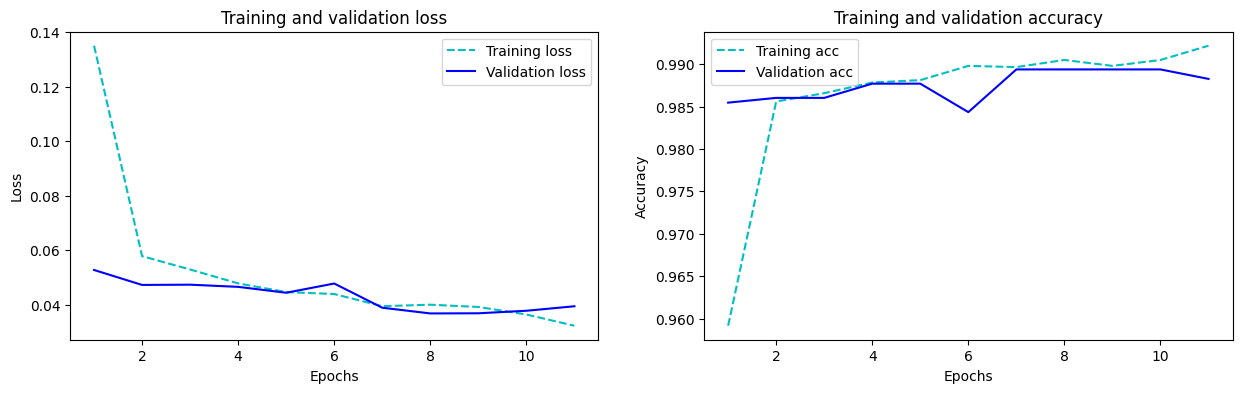

In [ ]:
#show graph loss and accuracy
fn.show_result(history_gru_w2v)

In [ ]:
gru_w2v.inputs[0]

<KerasTensor: shape=(None, 79) dtype=float32 (created by layer 'embedding_4_input')>

In [ ]:
gru_w2v.outputs[0]

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_9')>

- Convert tflite model

In [ ]:
run_model = tf.function(lambda x: gru_w2v(x))
# This is important, let's fix the input size.
BATCH_SIZE = 1
STEPS = max_len

concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE,STEPS], gru_w2v.inputs[0].dtype))


# model directory.
MODEL_DIR = "keras_gru"
gru_w2v.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
tflite_model = converter.convert()
# Save the TensorFlow Lite model to a file
file = open('ta_gru_w2v.tflite', 'wb')
file.write(tflite_model)
file.close()



In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='ta_gru_w2v.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)

Input details: [{'name': 'serving_default_x:0', 'index': 0, 'shape': array([ 1, 79], dtype=int32), 'shape_signature': array([ 1, 79], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall:0', 'index': 35, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([1, 1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


- Check the saved Tflite model to see if it works efficiently

In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='ta_gru_w2v.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


from sklearn.metrics import accuracy_score

# Initialize an empty list to store the predictions
predictions = []

# Iterate over each sample in the test dataset
for i in range(len(datatest)):
    # Get the input sequence for the current sample and convert it to FLOAT32
    input_sequence_float32 = datatest[i].reshape(1, -1).astype(np.float32)

    # Perform inference
    interpreter.set_tensor(input_details[0]['index'], input_sequence_float32)
    interpreter.invoke()

    # Get the output
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Convert output to binary prediction
    binary_prediction = (output_data > 0.5).astype(int)

    # Append the prediction to the list
    predictions.append(binary_prediction[0])

# accuracy for test data
accuracy5 = accuracy_score(labeltest, predictions)

# Print the accuracy for test data
print("Accuracy :", accuracy5)


Accuracy : 0.6


In [ ]:
# Display the predictions for each text
for i in range(len(datatest)):
    print("Text:", data_test['nltk'][i])
    print("True Label:", labeltest[i])
    print("Predicted Label:", predictions[i])
    print()


Text: beachwav use brows cart abandon remind boost engag revenu memori day sale strateg updat messag highlight final day get number entir site simpl yet effect chang emphas limitedtim natur offer creat great sens urgenc custom shop immedi take advantag deal expir
True Label: 0
Predicted Label: [1]

Text: sinc mani peopl eager await memori day sale shop summer cloth normal brand invit custom check late arriv ahead long holiday weekend messag come perfect time anyon consid buy new outfit annual barbecu outdoor gather come
True Label: 0
Predicted Label: [0]

Text: puriti coffe give audienc special mother day treat number sitewid plus free ship brand first announc sale sm earli may ensur peopl plenti time order continu promot midnight mother day send mix email sms remind send throughout sale period keep engag convers high
True Label: 0
Predicted Label: [0]

Text: make increas websit traffic around memori day dw home launch custom signup unit teas upcom offer captur new subscrib incentiv op